# Hands-on 02: Visualização de sinais na frequência (gerando e vendo o espectro de um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Visualização do conteúdo em frequência (_single_ e _double sided_) de um sinal;
- Descrever o projeto da UNIDADE I: Manipular sinais gravados em arquivos e estimar suas componentes de frequência e fase.

# Conteúdo em frequência do sinal

O conteúdo em frequência de um sinal pode ser analisado pela família de transformadas de Fourier. A análise de Fourier se deve ao físico e matemático Francês Jean Baptiste Joseph Fourier (1768-1830). 

Essencialmente, a análise de Fourier define um par de formulações. Uma formulação **direta** representa o conteúdo espectral do sinal, enquanto que a formulação **inversa** reconstrói o sinal correspondente no domínio do tempo por meio de seu conteúdo espectral.

O tipo de ferramenta de Fourier depende do tipo de sinal a ser analisado, existindo os seguintes casos:

1) Sinal contínuo no tempo e periódico: O sinal por ser escrito como um somatório (discreto) infinito de senos, cossenos ou exponenciais com  amplitudes diferentes. Isso define a **Série de Fourier** e sua inversa.

2) Sinal contínuo no tempo e não periódico: A série de Fourier pode ser escrita para números complexos e generalizada de forma infinitesimal para derivar a **Transformada de Fourier**.

3) Sinal discreto no tempo e periódico: O sinal é escrito como um somatório finito de base exponenciais, definindo a **Transformada Discreta de Fourier (DFT)**.

4) Sinal discreto no tempo e não periódico: Generalizando a DTF de forma infinitesimal obtemos a **Transformada de Fourier Discreta no Tempo (DTFT)** que serve para esse tipo de sinal.

A maioria das ferramentas de Fourier envolve somatórios que se estendem de -$\infty$ a +$\infty$. Isso é "relativamente" fácil de manipular em exercícios de sala de aula, mas como será que essas ferramentas serão tratadas com um número finito de amostras em um computador? De fato, falar em computador é falar de sinais discretos, o que reduz nosso trabalho a escolher entre duas ferramentas, a DFT (apropriada para sinais periódicos) ou a DTFT (apropriada para qualquer sinal).

De fato, senos e cossenos se estendem de -$\infty$ a +$\infty$ e nós não podemos usar, em um computador, sinais infinitamente longos para sinterizar outro sinal de tamanho finito. Uma forma de resolver esse dilema é fazer os dados finitos parecerem um sinal de tamanho infinito. Podemos imaginar que um sinal de 1024 pontos tem infinitos pontos para a direita e a esquerda. Se esses pontos forem igual a zero, temos um sinal não-periódico e podemos aplicar a DTFT. Como alternativa, podemos imaginar que as amostras a direita e a esquerda, antes iguais a zero, podem ser cópias dos 1024 pontos do sinal finito, formando um sinal discreto e periódico. Nesse segundo sinal que imaginamos podemos usar a DTF.

Por sua vez, um número infinito de senoides precisa ser usado para sintetizar sinais não-periódicos (DTFT), o que torna impossível o cálculo da DTFT em um computador. Assim, por eliminação, o único tipo de ferramenta de Fourier que pode ser usado em uma DSP é a DFT. Em outras palavras, computadores só podem trabalhar com sinais (informação) discreta e finita. Assim, ao mostrar o espectro de um sinal em um computador, você estará calculando a DFT!

Dito isso, para visualizarmos o conteúdo em frequência no computador lançamos mão da DFT, a qual tem a seguinte definição:

$$ X[k] = \sum_{n=0}^{N-1} x[n] \cdot  e^{-j \left( \frac{2\pi}{N}\right)k \cdot n}$$

A transformada inversa é dada por:

$$ x[n] = \sum_{n=0}^{N-1} X_k \cdot  e^{j \left( \frac{2\pi}{N}\right)k \cdot n}$$

## DFT no Matlab

A função **fft(x)** retorna a transformada discreta de Fourier (DFT) do vetor x calculado com o algorítmo FFT (_Fast Fourier Transform_). Por ser uma função **Built-in**, ela é protegida pelo Matlab, de forma que não é possível visualizá-la, mesmo que você digite os comandos **open fft** ou **edit fft**. Entretanto, é possível ver as descrições e exemplos com o comando "help fft".

Clique em **doc fft**, que um conjunto de informações adicionais.

In [3]:
% Descrição rápida da fft do Matlab
help fft

 FFT Discrete Fourier transform.
    FFT(X) is the discrete Fourier transform (DFT) of vector X.  For
    matrices, the FFT operation is applied to each column. For N-D
    arrays, the FFT operation operates on the first non-singleton
    dimension.
 
    FFT(X,N) is the N-point FFT, padded with zeros if X has less
    than N points and truncated if it has more.
 
    FFT(X,[],DIM) or FFT(X,N,DIM) applies the FFT operation across the
    dimension DIM.
    
    For length N input vector x, the DFT is a length N vector X,
    with elements
                     N
       X(k) =       sum  x(n)*exp(-j*2*pi*(k-1)*(n-1)/N), 1 <= k <= N.
                    n=1
    The inverse DFT (computed by IFFT) is given by
                     N
       x(n) = (1/N) sum  X(k)*exp( j*2*pi*(k-1)*(n-1)/N), 1 <= n <= N.
                    k=1
 
    See also FFT2, FFTN, FFTSHIFT, FFTW, IFFT, IFFT2, IFFTN.

    Other functions named fft:
       uint8/fft
       uint16/fft
       iddata/fft
       codistributed

# Prática 2: Amplitude do espectro _single sided band_

Vamos praticar a construção da magnitude do espectro de um sinal senoidal de frequência única (um tom) sem usar as funções prontas do Matlab. Usaremos a função **stem($\cdot$)** ao invés da função **plot($\cdot$)**, isso facilitará a visualização no eixo da frequência.

**Passo 1:** Abra o Matlab e digite no _Command Window_ o seguinte comando:

```python
edit fft
```

Isso abrirá o arquivo **fft.m**. Observe que ele não tem código implementado (é uma função _Built-in_), geralmente implementada em C++, e com código escondido.

**Passo 2:** Agora digite no _Command Window_ o seguinte comando:

```python
edit psd
```

Isso abrirá o arquivo **psd.m**. Observe que ele não é uma função _Built-in_ e você pode ver seu código na íntegra.

**Passo 3:** Antes de usar a função do Matlab, vamos implementar um algoritmo para a DFT utilizando sua definição. Abra um script no Matlab, salve-o como **handson3_2.m** e escreva o seguinte código:

Tempo da DFT = 8.0308 s
  Name              Size                 Bytes  Class     Attributes

  Am                1x1                      8  double              
  L                 1x1                      8  double              
  N                 1x1                      8  double              
  T                 1x1                      8  double              
  WN                1x1                     16  double    complex   
  WNnk           2000x2000            64000000  double    complex   
  X                 1x2000               32000  double    complex   
  f                 1x1001                8008  double              
  fm                1x1                      8  double              
  fsampling         1x1                      8  double              
  k                 1x2000               16000  double              
  m                 1x2000               16000  double              
  n                 1x2000               16000  double              
  nn     

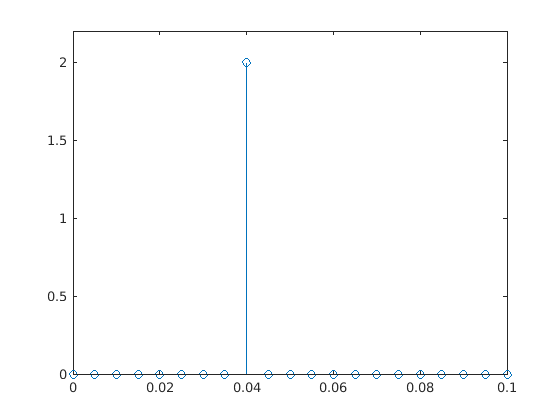

In [1]:
clc; close all;clear all;                             % Limpa variáveis e fecha todos os gráficos
%% Geração do sinal cosenoidal
fsampling = 10;                                       % Taxa de amostragem
T =1/fsampling;                                       % Tempo entre amostras
L = 2000;                                             % Número de amostras
t = 0 : (1/fsampling) : (L-1)*T;                      % Eixo do tempo
fm = 0.04;                                            % Frequência da senoide
Am = 2;                                               % Amplitude da senoide
m = Am*cos(2*pi*fm*t);                                % Sinal senoidal
t1=tic;                                               % Contador de tempo

%% Montando a DFT
N=length(m);                                          % Comprimento do sinal m(t)
n=0:N-1;                                              % Vetor n
k=0:N-1;                                              % Vetor k
WN=exp(-j*2*pi/N);                                    % Cálculo de Wn = e^{-j2pi/N}
nn=n'*k;                                              % Monta a Matriz DFT
WNnk=WN.^nn;                                          % Monta a Matriz DFT
X=m*WNnk/L;                                           % Implementa o somatório da DFT via operação matricial    
f = fsampling/2*linspace(0,1,(L/2)+1);                % Monta o eixo das frequências
tempo_DFT=toc(t1);                                    % Conta tempo de execução até esse ponto do código
disp(['Tempo da DFT = ' num2str(tempo_DFT) ' s']);    % Mostra tempo de execução
stem(f,2*abs(X(1:L/2+1)));                            % Mostra gráfico do espectro 
axis([ 0 0.1 0 2.2]);                                 % Zoom para melhor visualização 
% A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
% identificando suas principais caracteristicas.
whos

Inspecione o código com calma. Veja o tamanho das variáveis criadas e tente entender a forma matricial de como foi calculado o somatório da DFT. Caso queira verificar mais detalhes, consulte a bibliografia indicada no final do experimento.

# Prática 3: Amplitude do espectro usando as funções do Matlab

Agora vamos usar as funções prontas do Matlab para gerar o espectro de um sinal. Seguiremos os seguintes passos:
- Definir o tamanho da FFT (resolução em frequência);
- Definir a frequência de amostragem (seguindo a montagem do sinal no tempo);
- Normalizar a amplitude;
- Definir o eixo da frequência de acordo com o comprimento da FFT e a taxa de amostragem.

A resolução mínima de frequência será determinada pelo número de pontos da FFT e a taxa de amostragem. 

**Passo 1:** Abra um script no Matlab, salve-o como **handson3_3.m** e escreva o seguinte código:

Tempo da FFT = 1.0844


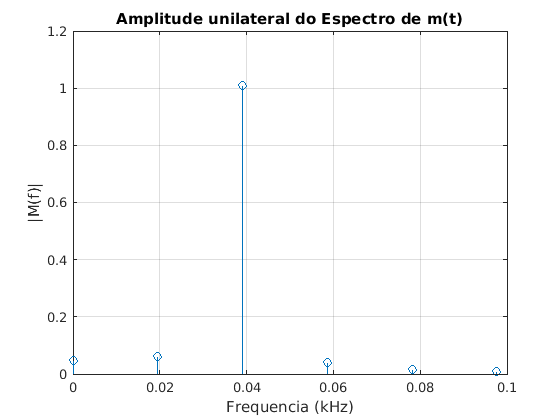

In [2]:
clc; close all;clear all;                                     % Limpa variáveis e fecha todos os gráficos
%% Geração do sinal cosenoidal
fsampling = 10;                                               % Taxa de amostragem
tf = 200;                                                     % Tempo entre amostras
t = 0 : (1/fsampling) : tf;                                   % Eixo do tempo
fm = 0.04;                                                    % Frequência da senoide
Am = 2;                                                       % Amplitude da senoide
m = Am*cos(2*pi*fm*t);                                        % Sinal senoidal
t1=tic;                                                       % Contador de tempo

%% Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 512;                                                   % Tamanho da FFT  
% Construção do single-sided amplitude spectrum.
yfft = fft(m,lfft)/lfft;                                      % Cálculo da FFT via função do Matlab
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];  % Definição do eixo das frequências unilateral
yfftuni = yfft(1:lfft/2);                                     % Coleta da FFT unilateral
stem(freq1,abs(yfftuni));                                     % Plotagem do espectro unilateral M(f)
tempo_FFT=toc(t1);                                            % Conta tempo de execução até esse ponto do código
disp(['Tempo da FFT = ' num2str(tempo_FFT)]);                 % Mostra de tempo de execução
title('Amplitude unilateral do Espectro de m(t)');            % Configuração do título do gráfico 
xlabel('Frequencia (kHz)');                                   % Configuração do eixo x do gráfico 
ylabel('|M(f)|');                                             % Configuração do eixo y do gráfico  
grid on;                                                      % Adiona o grid  
axis([ 0 0.1 0 1.2]);                                         % Zoom do gráfico

Pelo gráfico, vemos que o pico não está centrado em 0,04 kHz. Podemos ver que quando a curva se aproxima de 0,04 kHz a amplitude cresce e em seguida decresce. Isso é muito comum de acontecer, e se deve ao fato de que o eixo da frequência não está definido o valor de 0.04. Vamos inspecionar a variável _freq1_, os pontos mais pŕoximos de 0,04 são 0.0391 kHz e 0.0586 kHz, por isso o gráfico está aparentemente deslocado. Caso estivesse definido em 0.04, haveria o pico máximo. 

**Passo 2:** Vamos inspecionar as variável _freq1_, digite _freq1_ no _Command Windows_ do Matlab:

In [3]:
% Seis primeiros termos do vetor freq1 mostram que ele não está definido em 0.04 kHz.
freq1(1:6)


ans =

         0    0.0195    0.0391    0.0586    0.0781    0.0977



O motivo de usar a função **stem($\cdot$)** no lugar de **plot($\cdot$)** é que esta última faz a ligação dos pontos subsequentes e os aproxima como retas, o que pode mascarar o real comportamento do espectro. 


**Passo 3:** Vamos verificar a influência do tamanho da FFT no espectro mostrado. Abra um script no Matlab, salve-o como **handson3_4.m** e escreva o seguinte código. O código ilustra os dois casos: (i) Quando o tamanho da FFT gera um eixo que inclui a frequência da senoide; e (ii) Quando o tamanho da FFT **não** gera um eixo que inclui a frequência da senoide.

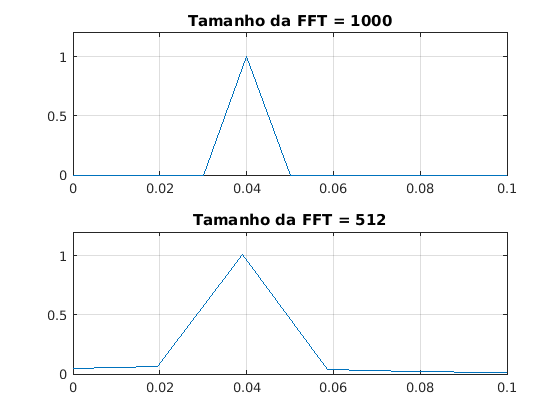

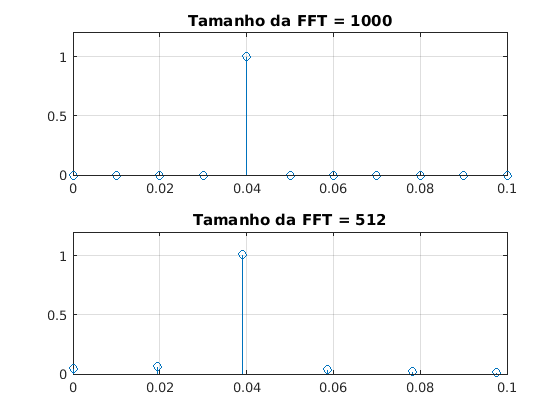

In [2]:
clc; close all;clear all;                                        % Limpa variáveis e fecha todos os gráficos
%% Geração do sinal cosenoidal
fsampling = 10;                                                  % Taxa de amostragem
tf = 200;                                                        % Tempo entre amostras
t = 0 : (1/fsampling) : tf;                                      % Eixo do tempo
fm = 0.04;                                                       % Frequência da senoide
Am = 2;                                                          % Amplitude da senoide
m = Am*cos(2*pi*fm*t);                                           % Sinal senoidal

%% Visualizando a amplitude do espectro com um tamanho arbitrário para a FFT
lfft = 1000;                                                  % Tamanho da FFT
yfft = fft(m,lfft)/lfft;                                      % Cálculo da FFT via função do Matlab
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];  % Definição do eixo das frequências unilateral
yfftuni = yfft(1:lfft/2);                                     % Coleta da FFT unilateral
subplot(2,1,1)
stem(freq1,abs(yfftuni));                                     % Plotagem do espectro unilateral M(f)
grid on;
title(['Tamanho da FFT = ' num2str(lfft)]);
axis([ 0 0.1 0 1.2]);

%% Visualizando a amplitude do espectro com um tamanho arbitrário para a FFT
lfft2 = 512;                                                   % Tamanho da FFT
yfft2 = fft(m,lfft2)/lfft2;                                    % Cálculo da FFT via função do Matlab
freq2 = [0 : fsampling/lfft2 : fsampling/2 - fsampling/lfft2]; % Definição do eixo das frequências unilateral
yfftuni2 = yfft2(1:lfft2/2);                                   % Coleta da FFT unilateral
subplot(2,1,2)
stem(freq2,abs(yfftuni2));                                     % Plotagem do espectro unilateral M(f)
grid on;
title(['Tamanho da FFT = ' num2str(lfft2)]);
axis([ 0 0.1 0 1.2]);

%% Gráficos com a função plot()
figure;
subplot(2,1,1)
plot(freq1,abs(yfftuni));                                     % Plotagem do espectro unilateral M(f)
grid on;
title(['Tamanho da FFT = ' num2str(lfft)]);
axis([ 0 0.1 0 1.2]);
subplot(2,1,2)
plot(freq2,abs(yfftuni2));                                     % Plotagem do espectro unilateral M(f)
grid on;
title(['Tamanho da FFT = ' num2str(lfft2)]);
axis([ 0 0.1 0 1.2]);



Note que conseguimos visualizar melhor o desvio da frequência central quando usamos a função **stem($\cdot$)**.

# Prática 4: _Double-sided amplitude spectrum_

Queremos mostrar agora os dois lados (positivo e negativo) do espectro frequência. Para isso definiremos alguns vetores de forma diferente que as práticas anteriores.

**Passo 1:** Abra um script no Matlab, salve-o como **handson3_5.m** e escreva o seguinte código:

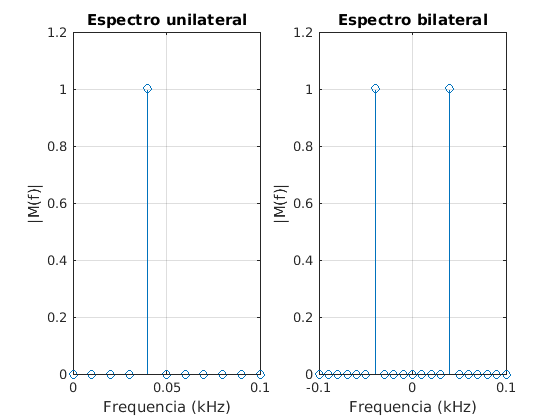

In [1]:
clc; close all;clear all;                                     % Limpa variáveis e fecha todos os gráficos
%% Geração do sinal cosenoidal
fsampling = 10;                                               % Taxa de amostragem
tf = 200;                                                     % Tempo entre amostras
t = 0 : (1/fsampling) : tf;                                   % Eixo do tempo
fm = 0.04;                                                    % Frequência da senoide
Am = 2;                                                       % Amplitude da senoide
m = Am*cos(2*pi*fm*t);                                        % Sinal senoidal

%% Plot do sinal M(f): single-sided amplitude spectrum.
% Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 1000;
%% Construção do single-sided amplitude spectrum.
yfft = fft(m,lfft)/lfft;                                      % Cálculo da FFT via função do Matlab
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];  % Definição do eixo das frequências unilateral
yfftuni = yfft(1:lfft/2);                                     % Coleta da FFT unilateral
subplot(1,2,1);
stem(freq1,abs(yfftuni));                                     % Plotagem do espectro unilateral M(f)
title('Espectro unilateral');                                 % Configuração do título do gráfico 
xlabel('Frequencia (kHz)');                                   % Configuração do eixo x do gráfico 
ylabel('|M(f)|');                                             % Configuração do eixo y do gráfico  
grid on;                                                      % Adiona o grid  
axis([ 0 0.1 0 1.2]);                                         % Zoom do gráfico

%% Plot do sinal M(f): double-sided amplitude spectrum.
% Colocando as frequência no lado esquerdo; 
subplot(1,2,2);
%% Construção do double-sided amplitude spectrum.
lfftd = 1000;
yfftd = fft(m,lfftd)/lfftd;                                   % Cálculo da FFT via função do Matlab
yfftd = fftshift(yfftd);
% Definição do eixo das frequências unilateral
freqd = [-fsampling/2 : fsampling/lfftd : fsampling/2 - fsampling/lfftd];
stem(freqd,abs(yfftd));                                       % Plotagem do espectro unilateral M(f)
title('Espectro bilateral');                                  % Configuração do título do gráfico 
xlabel('Frequencia (kHz)');                                   % Configuração do eixo x do gráfico 
ylabel('|M(f)|');                                             % Configuração do eixo y do gráfico  
grid on;                                                      % Adiona o grid  
axis([ -0.1 0.1 0 1.2]);                                      % Zoom do gráfico

Para o plot do espectro com as duas partes da banda (positiva e negativa) precisamos tomar cuidado com o eixo das frequências e não precisamos limitar a saída da função **fft($\cdot$)**. Outra ação necessária é usar a função **fftshift($\cdot$)** para centralizar o espectro em torno do zero. Veja a seguir o help da função _fftshift_.

In [3]:
help fftshift

 FFTSHIFT Shift zero-frequency component to center of spectrum.
    For vectors, FFTSHIFT(X) swaps the left and right halves of
    X.  For matrices, FFTSHIFT(X) swaps the first and third
    quadrants and the second and fourth quadrants.  For N-D
    arrays, FFTSHIFT(X) swaps "half-spaces" of X along each
    dimension.
 
    FFTSHIFT(X,DIM) applies the FFTSHIFT operation along the 
    dimension DIM.
 
    FFTSHIFT is useful for visualizing the Fourier transform with
    the zero-frequency component in the middle of the spectrum.
 
    Class support for input X:
       float: double, single
 
    See also IFFTSHIFT, FFT, FFT2, FFTN, CIRCSHIFT.

    Reference page in Help browser
       doc fftshift



Note também que existe uma relação importante entre a **taxa de amostragem**, o **número de amostras da FFT** e a resolução do gráfico do espectro do sinal. Observe que a frequência máxima e mínima é a metade da taxa de amostragem (claro, a mínima negativa e a máxima positiva). A resolução do gráfico do espectro, diferença de frequência entre pontos vizinhos do gráfico do espectro, é a razão entre a **taxa de amostragem** e o **número de pontos da FFT**. 

# Projeto da UNIDADE I


Agora que você já sabe gerar e visualizar um sinal no tempo e na frequência, o projeto da UNIDADE I traz o desafio de você descobrir tanto a frequência como a fase de um sinal gravado em arquivo.


O arquivo de cada aluno está identificado por sua matrícula na pasta [./CODES/HD_02_files](./CODES/HD_02_files). Por exemplo, o arquivo **2014089577.mat** é do aluno com matrícula 2014089577.


Cada arquivo (gerado no Matlab) tem os seguinte conjunto de dados:

- **fs**: frequência de amostragem (taxa de amostragem)
- **t_sample**: vetor com os instantes das amostras do sinal 
- **x**: amostras dos sinal

O sinal $x$ é composto por uma soma de 2 a 5 senos com frequências e fases diferentes. Seu objetivo é, por meio do sinal $x$, estimar quantos senos compõem o sinal, quais suas frequências e respectivas fases.

Um material muito bom para guia-lo na execução do projeto é: 

[Profs. Larissa Driemeier/Marcilio Alves/Rafael T. Moura, ESCOLA POLITÉCNICA DA UNIVERSIDADE DE SÃO PAULO, Departamento de Engenharia Mecatrônica, Instrumentação](./MATERIAL/HD_03_MATLAB/AnaliseSinais_Instrumentacao.pdf)
[Link para versão na web](https://edisciplinas.usp.br/pluginfile.php/4398247/mod_resource/content/4/AnaliseSinais_Instrumentacao.pdf)

Minha sugestão é:

1. Leia o material, siga os experimentos (pelo menos até a página 9). O sinal foi gerado minimizando o Leakage;
2. Abra o arquivo com sua matrícula, manipule o sinal $x$ e estime as frequências e, fases correspondentes, que o compõe. **Dica**: você pode utilizar a função **findpeaks** no espectro do sinal!!!


Além de enviar o código pelo SIGAA, a entrega só será completa se você gravar um vídeo de até 5 minutos explicando seu código e mostrando os valores estimados. 

O link para o vídeo deve ser compartilhado no youtube (de forma privada) para o prof. Vicente Sousa pelo e-mail **vicente.sousa@ufrn.edu.br**.



# Bibliografia

Steven W. Smith, The Scientist and Engineer's Guide to Digital Signal Processing (http://www.dspguide.com/ch8/1.htm ).

Steve Mann, The Discrete Fourier Transform (http://wearcam.org/ece431/course_material/fourierop_and_dit.htm ).

Wikipedia: DFT matrix (https://en.wikipedia.org/wiki/DFT_matrix)

OKTAY ALKIN, SIGNALS and SYSTEMS - A MATLAB Integrated Approach, 2014.

MATTHEW N. O. SADIKU and WARSAME H. ALI, Signals and Systems A Primer with MATLAB, 2015.

Ricardo Tokio Higuti, Processamento Digital de Sinais - Notas de Aula - Analise Espectral Usando a DFT (http://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/ele1095_5_analiseespectral.pdf)

Digital Signal Processing - Part 3: Discrete-Time Signals & Systems Case Studies (http://aparate.elth.ucv.ro/web/Arhiva/Matla/matlabsignal.pdf)


